In [1]:
import numpy as np
import matplotlib.pyplot as plt
import examples
import pandas as pd

# Introduction to Linear Regression

**Linear regression** attempts to model the relationship between two variables ($x$ and $y$) by fitting a linear equation $y = \theta_1 x+\theta_0$ to observed data.
One variable is considered to be an explanatory variable ($x)$, and the other is considered to be a dependent variable ($y$). 
Linear regression is used to predict values within a continuous range, (e.g. sales, price)

**Table of Contents**

- [A First Example](#1.-A-First-Example)
- [The Mean Squared Error](#2.-The-Mean-Squared-Error)
- [Minimizing the MSE: The Normal Equations](#3.-Minimizing-the-MSE:-The-Normal-Equations)
- [Making Predictions](#4.-Making-Predictions)
- [Example: The World Happiness Report](#5.-Example:-The-World-Happiness-Report)

## 1. A First Example

The following cell generates (and plots) a linear-looking dataset

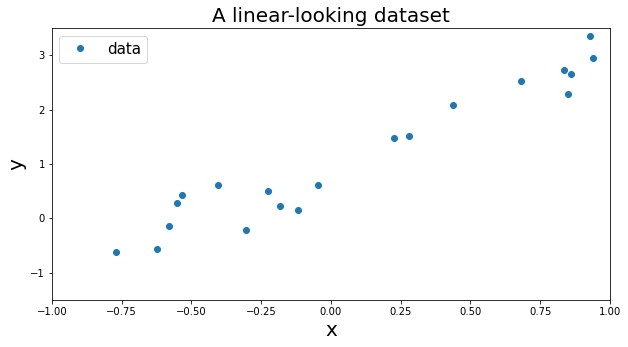

In [2]:
'generate and plot a toy dataset'
m = 20 # number of points
x = -1 + 2*np.random.rand(m) # m random points over the interval [-1,1]
y = 2*x+1+0.25*np.random.randn(m) # y = 2x+1 + random noise
plt.figure(figsize=(10,5)) 
plt.plot(x,y,'o', label='data')
plt.xlim([-1,1])
plt.ylim([-1.5,3.5])
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.title('A linear-looking dataset',fontsize=20)
plt.legend(fontsize=15, loc='upper left')

The plot shows that the two variables $x$ and $y$ are roughly correlated: the larger $x$ is, the larger $y$ is. We can quantify this by attempting to fit a linear model

$$
y = \theta_1 x+\theta_0
$$

In order to find a good linear model for our data, we need a measure of how well (or poorly) a model fits the data. The most common performance measure is the **Mean Squared Error** (MSE):

$$
\mathrm{MSE} = \frac{1}{m}\sum_{i=1}^m\left(y_i - (\theta_1 x_i+\theta_0) \right)^2
$$


The cell below displays the MSE of a linear model. 
You can change interactively the slope ($\theta_1$) and the bias ($\theta_0$) of the model.

In [3]:
from examples import interactive_example
interactive_example(x,y)

interactive(children=(FloatText(value=-1.0, description='theta1 (slope)', step=0.1), FloatText(value=0.0, desc…

## 2. The Mean Squared Error

Using **Linear Algebra** notation, the MSE can be written more concisely as

$$ 
\mathrm{MSE} = \frac{1}{m}\|y-X\theta\|_2^2
$$

where

$$
X = \begin{bmatrix}
1 & x_1\\
1 & x_2\\
\vdots & \vdots \\
1 & x_m
\end{bmatrix}, \quad
y = \begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_m
\end{bmatrix}, \quad \mbox{and} \quad
\theta = 
\begin{bmatrix}
\theta_0\\ \theta_1
\end{bmatrix}.
$$

The matrix $X$ is called the **feature matrix** and the vector $y$ is called the **target vector**. 
The vector $\theta$ contains the parameters of the linear model (the slope $\theta_1$ and the bias $\theta_0$).

In [4]:
'build feature matrix'
m = len(x)
X = np.ones((m,2))
X[:,1] = x

In [5]:
X

array([[ 1.        ,  0.68137352],
       [ 1.        , -0.7692454 ],
       [ 1.        ,  0.86206637],
       [ 1.        ,  0.8495098 ],
       [ 1.        , -0.4053784 ],
       [ 1.        ,  0.83645231],
       [ 1.        ,  0.92965443],
       [ 1.        , -0.53402449],
       [ 1.        , -0.11638776],
       [ 1.        , -0.18414645],
       [ 1.        ,  0.22420414],
       [ 1.        , -0.22672678],
       [ 1.        , -0.55156599],
       [ 1.        , -0.62288202],
       [ 1.        , -0.04697797],
       [ 1.        , -0.30331883],
       [ 1.        , -0.58076752],
       [ 1.        ,  0.4385295 ],
       [ 1.        ,  0.27909573],
       [ 1.        ,  0.93827369]])

The image below displays the MSE function.

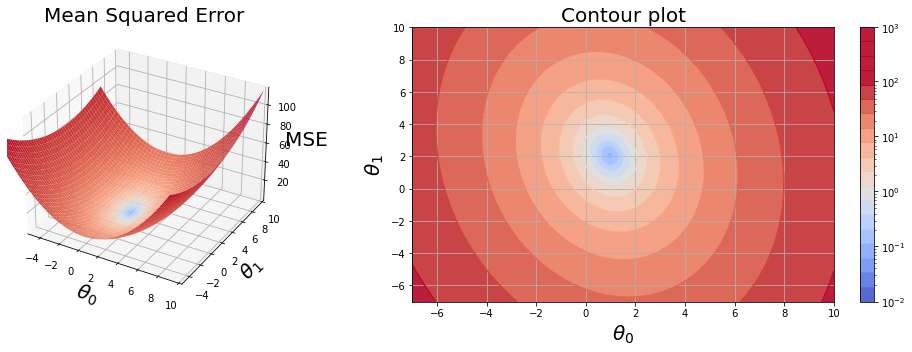

In [6]:
examples.plot_mse(x,y)

In [7]:
'MSE function implementation'
def MSE(X,y,theta):
    MSE = np.sum((y-X.dot(theta))**2)/m
    return MSE

In [8]:
MSE(X,y,np.array([4,2]))

9.281079067922736

## 3. Minimizing the MSE: The Normal Equations

To find the line that best fits the datapoints, we need to find the parameters $\theta_0$, $\theta_1$ that minimizes the MSE 
cost function.

$$
\min_\theta \|y-X\theta\|_2^2.
$$

This is an example of a **least squares problem**. 
From Linear Algebra, we know that the (unique) vector $\theta$ that minimizes $\|y-X\theta\|_2^2$ satisfies the **normal equations**

$$
X^TX\, \theta = X^Ty.
$$

Numpy has a built-in function for solving least squares problems: $\tt numpy.linalg.lstsq$ ([referenge page](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html))

In [9]:
'best parameters'
theta = np.linalg.lstsq(X,y,rcond=None)[0]
theta

array([0.96724917, 2.04971006])

In [10]:
'means squared error'
MSE(X,y,theta)

0.10823662026017988

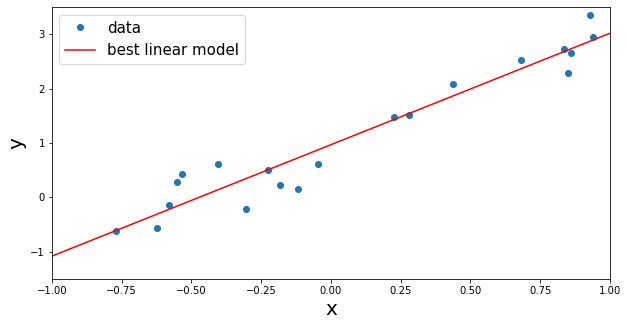

In [11]:
' plot datapoints + best linear model'
plt.figure(figsize=(10,5)) 
'plot datapoints'
plt.plot(x,y,'o', label='data')
plt.xlim([-1,1])
plt.ylim([-1.5,3.5])
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)

'plot line'
m_plot = 100
x_plot = np.linspace(-1,1,m_plot)
X_plot = np.ones((m_plot,2))
X_plot[:,1] = x_plot
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r', label='best linear model')

plt.legend(fontsize=15, loc='upper left')

## 4. Making Predictions

We can now predict the output $y_{\rm new}$ of a new inmput feature $x_{\rm new}$ by simply plugging the new input into the tuned linear model:

$$
y_{\rm new} = \theta_1 x_{\rm new} + \theta_0
$$

In [12]:
from examples import interactive_prediction
interactive_prediction(x,y)

interactive(children=(FloatSlider(value=0.0, description='new point', max=1.5, min=-1.5), Output()), _dom_clas…

## 5. Example: The World Happiness Report

The **World Happiness 2017** dataset, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th.

In [13]:
data = pd.read_csv('2017.csv')
data.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [14]:
data.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. 

The goal is to use the GDP per Capita to predict the Happiness Score

In [15]:
x = data['Economy..GDP.per.Capita.'].to_numpy()
y = data['Happiness.Score'].to_numpy()

Text(0, 0.5, 'Happiness Score')

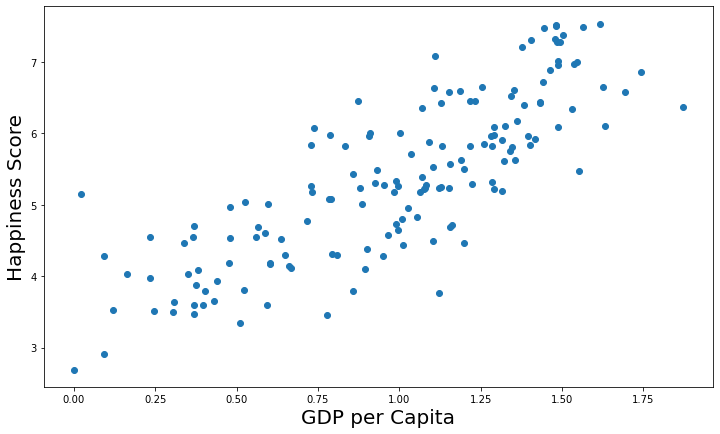

In [16]:
plt.figure(figsize=(12,7))
plt.plot(x,y,'o')
plt.xlabel('GDP per Capita',fontsize=20)
plt.ylabel('Happiness Score',fontsize=20)

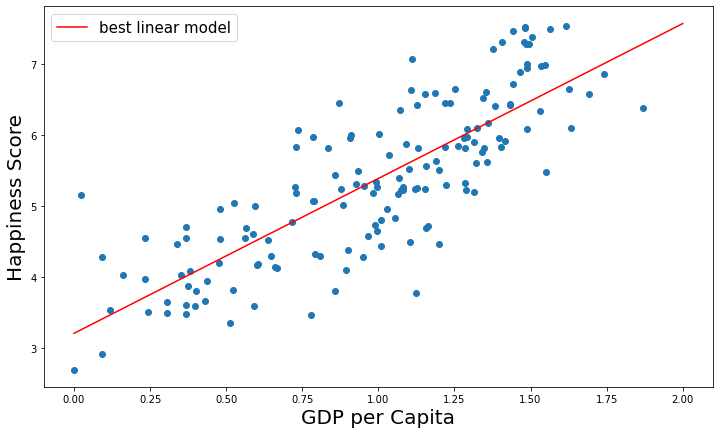

In [17]:
'build feature matrix'
m = len(x)
X = np.ones((m,2))
X[:,1] = x

'fit a line to the model'
theta = np.linalg.lstsq(X,y,rcond=None)[0]

'plot datapoints'
plt.figure(figsize=(12,7))
plt.plot(x,y,'o')
plt.xlabel('GDP per Capita',fontsize=20)
plt.ylabel('Happiness Score',fontsize=20)

'plot line'
m_plot = 100
x_plot = np.linspace(0,2,m_plot)
X_plot = np.ones((m_plot,2))
X_plot[:,1] = x_plot
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r', label='best linear model')

plt.legend(fontsize=15, loc='upper left')